In [1]:
import numpy as np
import pandas as pd

import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

plt.rcParams['figure.figsize']  = (10, 6)
plt.rcParams['axes.labelsize']  = 10
plt.rcParams['axes.titlesize']  = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['lines.linewidth'] = 2

plt.ion()
plt.style.use('seaborn-colorblind')

sns.set_theme(style="whitegrid")

In [2]:
df_tiktok = pd.read_csv('../data/tiktok_clean.csv')
df_not_pop = pd.read_csv('../data/nao_pop.csv')
# df_not_pop_in_tiktok = pd.read_csv('../data/nao_pop.csv')

In [3]:
df_tiktok

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,release_year
0,6kVuF2PYLuvl9T85XjNbaO,Lay It Down Gmix - Main,1Xfmvd48oOhEWkscWyEbh9,Lloyd,43C6GVlhXG4KfZuEbxty3r,302186,2011-01-01,28,0.597,0.800,...,0.3120,0.0461,0.000000,0.1800,0.565,155.932,6kVuF2PYLuvl9T85XjNbaO,6kVuF2PYLuvl9T85XjNbaO,5.036433,2011
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,...,0.0628,0.0564,0.000000,0.2240,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,2007
2,1dIWPXMX4kRHj6Dt2DStUQ,Chosen (feat. Ty Dolla $ign),4qXC0i02bSFstECuXP2ZpL,Blxst,7AwrgenNcTAJlJF3pKL0Qr,161684,2020-12-04,76,0.571,0.767,...,0.2870,0.3360,0.000000,0.0809,0.605,93.421,1dIWPXMX4kRHj6Dt2DStUQ,1dIWPXMX4kRHj6Dt2DStUQ,2.694733,2020
3,4QVS8YCpK71R4FsxSMCjhP,Tie Me Down (with Elley Duhé),2ZRQcIgzPCVaT9XKhXZIzh,Gryffin,69t8rpgBN1ov5kCU6LDMuR,218295,2018-08-03,72,0.548,0.839,...,0.0644,0.1350,0.000000,0.1020,0.314,98.932,4QVS8YCpK71R4FsxSMCjhP,4QVS8YCpK71R4FsxSMCjhP,3.638250,2018
4,7BoobGhD4x5K96Me0hqC8Q,Build a Bitch,26cMerAxjx9GedFt0lMDjm,Bella Poarch,5YKqfiQdPYWJ0kZ5pttY5o,122772,2021-05-14,89,0.855,0.463,...,0.0367,0.2170,0.000018,0.3470,0.866,102.931,7BoobGhD4x5K96Me0hqC8Q,7BoobGhD4x5K96Me0hqC8Q,2.046200,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,1lNHWPDvKEbamKezpLq7HW,no song without you,0Vw76uk7P8yVtTClWyOhac,HONNE,3DG5MS8iKYcJROCnb1DYDf,160346,2020-07-03,64,0.788,0.473,...,0.0328,0.4890,0.254000,0.1090,0.810,105.429,1uOzLrMZoqPIIctv9m48L0,TikTok Trending Philippines: It Really Hurts G...,2.672433,2020
4025,7gd01LMH2gBcoDngSt8sq9,Next To You (feat. Justin Bieber),7bXgB6jMjp9ATFy66eO08Z,Chris Brown,6df0qvkMXoyHGt9J8cujZb,265813,2011-03-22,70,0.670,0.676,...,0.0370,0.0201,0.000000,0.1100,0.349,114.974,1uOzLrMZoqPIIctv9m48L0,TikTok Trending Philippines: It Really Hurts G...,4.430217,2011
4026,5PYQUBXc7NYeI1obMKSJK0,Never Really Over,6jJ0s89eD6GaHleKKya26X,Katy Perry,3KjXg0MDej2pG9fv6I22lT,223523,2019-05-31,77,0.770,0.882,...,0.0602,0.1940,0.000000,0.3160,0.385,99.991,1uOzLrMZoqPIIctv9m48L0,TikTok Trending Philippines: It Really Hurts G...,3.725383,2019
4027,37f4ITSlgPX81ad2EvmVQr,Fight Song,3QLIkT4rD2FMusaqmkepbq,Rachel Platten,0mFDIOqypzHp6Xd0el1hoT,204013,2016-01-01,79,0.564,0.714,...,0.1290,0.0549,0.000000,0.1550,0.330,175.924,1uOzLrMZoqPIIctv9m48L0,TikTok Trending Philippines: It Really Hurts G...,3.400217,2016


In [4]:
df_not_pop

,track_id,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,release_year
0,2P1mLMA0W0wpLPPlYIhBa9,209176,22,0.488,0.832,2,-2.332,0,0.0418,0.010700,0.3950,0.1120,0.422,107.015,3.486267,2022
1,2Zh1LkF9VziQVUjzIFlyi9,367426,41,0.565,0.680,7,-7.609,1,0.0269,0.004600,0.0936,0.0760,0.121,116.973,6.123767,1989
2,1390XaOMSPI8rJUyKiL18Y,268250,3,0.566,0.742,4,-5.875,0,0.0336,0.001610,0.2380,0.1070,0.140,119.952,4.470833,2021
3,1bqerS49YfUgCimJQJPUsC,201504,27,0.598,0.680,9,-11.749,0,0.0507,0.413000,0.8940,0.1110,0.426,156.018,3.358400,2016
4,5trdk633doJmre0SiVIZwV,292480,13,0.516,0.906,9,-7.155,1,0.0347,0.032400,0.5830,0.1320,0.275,155.996,4.874667,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2hvkMwP8VNMyxTHnXJSDRL,204511,26,0.458,0.799,6,-7.587,1,0.0444,0.000636,0.0493,0.2520,0.354,139.926,3.408517,1995
2496,5d8lDiG2BrvdiosoZYl5lD,257088,27,0.522,0.747,2,-9.554,1,0.0330,0.000022,0.8680,0.1390,0.313,124.995,4.284800,2019
2497,3gAQXcQx8kkQdZfa5dK7br,193038,4,0.493,0.846,2,-5.953,1,0.0280,0.007160,0.8490,0.0955,0.447,134.966,3.217300,2022
2498,4olsMaLbdIBrk2Iwq0s00V,327388,32,0.697,0.686,10,-9.602,1,0.0283,0.034400,0.7600,0.1130,0.679,135.022,5.456467,2016


In [5]:
# df_not_pop_in_tiktok

In [6]:
col_tiktok = df_tiktok.columns
col_not_pop = df_not_pop.columns
# col_not_pop_in_tiktok = df_not_pop_in_tiktok.columns

intersect = [item for item in col_tiktok if item in col_not_pop]

df_tiktok_filtered = df_tiktok[intersect].copy()
df_not_pop_filtered = df_not_pop[intersect].copy()
# df_not_pop_in_tiktok = df_not_pop_in_tiktok[intersect].copy()

In [7]:
df_tiktok_filtered['base'] = 0
df_not_pop_filtered['base'] = 1
# df_not_pop_in_tiktok['base'] = 2

In [8]:
frames = [df_tiktok_filtered, df_not_pop_filtered]
df = pd.concat(frames)

In [9]:
df = shuffle(df)

In [10]:
df

,track_id,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,release_year,base
2415,0agwJVZQN3gIdB4gKHBGeU,120790,24,0.789,0.379,9,-15.723,1,0.4740,0.408000,0.00000,0.2410,0.546,160.046,2.013167,2020,0
413,01jIO8SJFnpSiNLH1JaBZ5,217386,68,0.735,0.453,8,-8.264,0,0.0602,0.413000,0.00000,0.1040,0.335,115.002,3.623100,2018,0
3057,3YLKkHR4fISvRe1N34l6EJ,191000,56,0.922,0.257,3,-17.462,1,0.0350,0.425000,0.17700,0.1170,0.468,111.988,3.183333,2021,0
951,25CMLaHAoc4mEfMwCNYhma,222493,41,0.283,0.579,0,-12.259,1,0.0382,0.000252,0.83100,0.0981,0.796,172.766,3.708217,1984,1
2102,4wHVLEe5nLaZ0D888d1ocw,303312,0,0.556,0.856,7,-5.008,1,0.0364,0.015900,0.00247,0.1140,0.249,138.050,5.055200,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,2eAvDnpXP5W0cVtiI0PUxV,233720,81,0.609,0.692,1,-2.958,1,0.0259,0.015700,0.00000,0.0864,0.454,116.959,3.895333,2017,0
126,75lgYxk3wB4elm0birw3uc,416933,36,0.598,0.723,10,-10.007,1,0.0293,0.024700,0.81600,0.0993,0.809,139.925,6.948883,2002,1
3967,6iSr6eZgeQ6oDFMWe05H3E,328980,26,0.848,0.797,11,-6.561,1,0.0647,0.104000,0.00896,0.0678,0.955,130.879,5.483000,2020,0
2430,1yLTcitjbEJr7a4jyDB0Lz,85741,71,0.799,0.543,10,-6.094,0,0.2400,0.051200,0.04250,0.1340,0.250,187.906,1.429017,2021,0


In [11]:
pca = PCA(n_components = 2)
kmeans = KMeans(n_clusters = 3, init = 'random', n_init = 10, max_iter = 1000)

In [12]:
#PCA

features = ['duration', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins', 'release_year']

samples = df.loc[:, features].values
labels = df['base'].values

samples = StandardScaler().fit_transform(samples)
df_pca = pca.fit_transform(samples)

data = []

for i, item in enumerate(df_pca):
    data.append([item[0], item[1], labels[i]])
    
data = np.array(data)

In [13]:
print('Variância explicada por cada componente:', pca.explained_variance_ratio_)
print('Total da variância explicada:', pca.explained_variance_ratio_.cumsum()[1])

Variância explicada por cada componente: [0.22459584 0.12743983]
Total da variância explicada: 0.3520356671688424


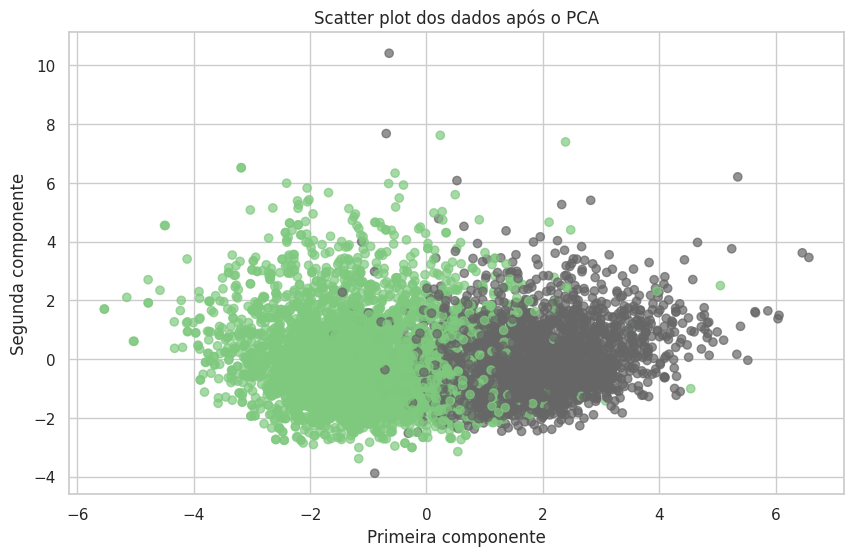

In [14]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="Accent", alpha=0.7)
plt.title("Scatter plot dos dados após o PCA")
plt.xlabel('Primeira componente')
plt.ylabel('Segunda componente')
plt.show()

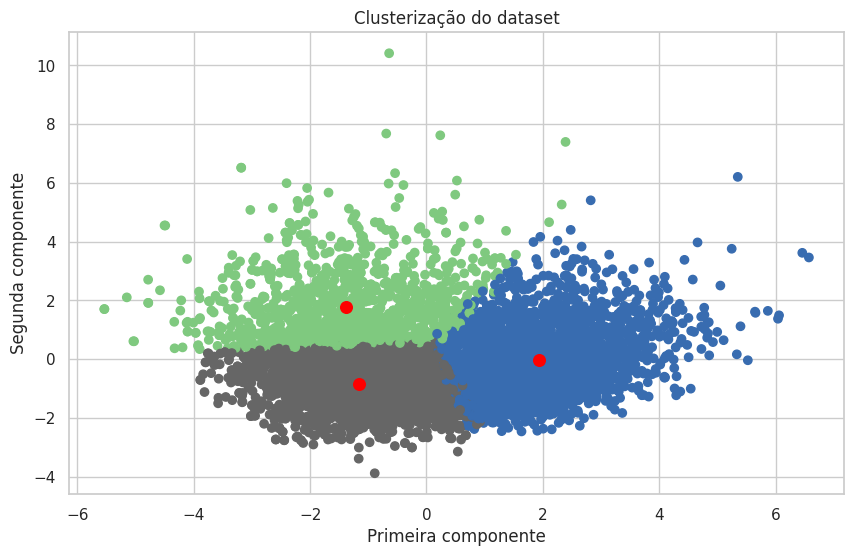

In [15]:
pred = kmeans.fit_predict(data)

plt.scatter(data[:, 0], data[:, 1], c=pred, cmap="Accent")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 70, c = 'red')
plt.title("Clusterização do dataset")
plt.xlabel('Primeira componente')
plt.ylabel('Segunda componente')
plt.show()

In [16]:
np.unique(pred)

array([0, 1, 2], dtype=int32)

In [43]:
unique, counts = np.unique(labels, return_counts=True)
original = dict(zip(unique, counts))

compare = {'original': original,
           'cluster': { 0: { 0: 0, 1: 0, 2: 0 }, 1: { 0: 0, 1: 0, 2: 0 }, 2: { 0: 0, 1: 0, 2: 0 } }
          }

for i, item in enumerate(data):
    compare['cluster'][pred[i]][data[i][2]] += 1
    
print(compare)

{'original': {0: 4029, 1: 2500}, 'cluster': {0: {0: 1211, 1: 78, 2: 0}, 1: {0: 210, 1: 2333, 2: 0}, 2: {0: 2608, 1: 89, 2: 0}}}


In [50]:
for label in compare['cluster']:
    zero = compare['cluster'][label][0]
    one = compare['cluster'][label][1]
    two = compare['cluster'][label][2]
    
    print(f"A label {label} é composta por: {zero} da label 0, {one} da label 1 e {two} da label 2.")

A label 0 é composta por: 1211 da label 0, 78 da label 1 e 0 da label 2.
A label 1 é composta por: 210 da label 0, 2333 da label 1 e 0 da label 2.
A label 2 é composta por: 2608 da label 0, 89 da label 1 e 0 da label 2.
